In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from skopt import BayesSearchCV
from skopt.space import Integer, Real, Categorical, Space
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
import pickle
import warnings
warnings.filterwarnings("ignore")
import shap
shap.initjs()
from sklearn.metrics import fbeta_score, make_scorer
# Create F2 score 
f2 = make_scorer(fbeta_score, beta=2, average='weighted')

In [2]:
with open('imp_dat.pickle', 'rb') as h:
    all_set = pickle.load(h)


In [3]:
class ShapPlot():
    
    def __init__(self, x_train, x_test, y_train, y_test, feat_nams, mdl):
        """
        Args: 
            training and test data
            list of feature names
            mdl: name of models (either 'svc' or 'rf')
        
        """
        self.x_train, self.x_test, self.y_train, self.y_test = (x_train, x_test, y_train, y_test)
        self.feat_nams = feat_nams
        self.mdl = mdl
        self.bst_mdl = None
        
    def train_mdl(self, niter=30, cv=5):
        #SVC
        svc = SVC(class_weight="balanced", kernel='rbf', probability=True)
        svm_parms = {'C': Real(0.01, 2, 'log-uniform'),
                 'degree': Integer(1, 5),
                 'kernel': Categorical(['poly', 'rbf'])}

        # RF 
        naivrf_mdl = RandomForestClassifier(150, class_weight="balanced",
                                    max_features="auto", n_jobs=-1)
        rf_parms = {'n_estimators': Integer(80, 1500),
            'max_depth': Integer(2, 6)}
        #
        mdls = {'svc': [svc, svm_parms], 'rf': [naivrf_mdl, rf_parms]}
        
        mdl_bays = BayesSearchCV(mdls[self.mdl][0], mdls[self.mdl][1], scoring=f2,
                             cv=cv, n_iter=niter, n_jobs=-1, verbose=1)
        mdl_bays.fit(self.x_train, self.y_train)
        self.bst_mdl = mdl_bays.best_estimator_.fit(self.x_train, self.y_train) 
        return mdl_bays.best_estimator_ 
    def shap_plot(self, clas_out=1, idx=3, sav=True):
        
        if self.mdl == 'svc':   
            explainer = shap.KernelExplainer(self.bst_mdl.predict_proba,
                                 shap.sample(self.x_train,40), link='logit')# Should be x train 
            shap_values = explainer.shap_values(self.x_test)
            exp = shap.Explanation(shap_values[0], explainer.expected_value,
                                   self.x_test, feature_names=self.feat_nams)
            # base values index for output classes. values index for instances
            shap.plots.force(exp.base_values[clas_out], exp.values[idx],
                             out_names=["Alive", "Expired"], link='logit')
            shap.plots.force(exp.base_values[clas_out],exp.values,
                             out_names=["Alive", "Expired"], link='logit')
        elif self.mdl == 'rf':
            explainer = shap.Explainer(self.bst_mdl, self.x_train) # should be x train
            shap_values = explainer(self.x_train, check_additivity=False)
            # for base values, 1 is class expired
            exp = shap.Explanation(shap_values.values, shap_values.base_values[0][clas_out],
                                   shap_values.data, feature_names=self.feat_nams)
            
            print('Plot 1')
            jj = shap.plots.force(exp[idx,:,clas_out], out_names=["Alive", "Expired"])
            shap.save_html('jj.html', jj)
            print('Plot 2')
            kk = shap.plots.force(exp[:,:,clas_out], feature_names=self.feat_nams)
            shap.save_html('kk.html', kk)

In [4]:
x_train, x_test, y_train, y_test = all_set.data_split()


y_train = pd.Series(y_train.ravel()).map({2:0, 1:1}).values
y_test = pd.Series(y_test.ravel()).map({2:0, 1:1}).values

In [5]:
shp_plt = ShapPlot(x_train, x_test, y_train, y_test,
                   feat_nams=list(all_set.dataframe.drop('outcome', axis=1).columns), 
                  mdl = 'svc')

In [6]:
shp_plt.train_mdl(niter=2)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


SVC(C=1.1440197772074365, class_weight='balanced', degree=1, kernel='poly',
    probability=True)

In [7]:
shp_plt.shap_plot()

  0%|          | 0/400 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [178]:
#SVC
svc = SVC(class_weight="balanced", kernel='rbf', probability=True)
svm_parms = {'C': Real(0.01, 2, 'log-uniform'),
                 'degree': Integer(1, 5),
                 'kernel': Categorical(['poly', 'rbf'])}

# RF 
naivrf_mdl = RandomForestClassifier(150, class_weight="balanced",
                                    max_features="auto", n_jobs=-1)

rf_parms = {'n_estimators': Integer(80, 1500),
            'max_depth': Integer(2, 6)}
#
mdls = {'svc': [svc, svm_parms], 'rf': [naivrf_mdl, rf_parms]}


mdl_bays = BayesSearchCV(mdls[mdl][0], mdls[mdl][1], scoring=f2,
                             cv=cv, n_iter=niter, n_jobs=-1, verbose=1)
xx_train = np.random.randn(50,20)    
y_train = np.random.randint(0,2,(50,))   
mdl_bays.fit(xx_train, y_train)
final_mdl = mdl_bays.best_estimator_    



Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [177]:
mdl = 'rf'

In [6]:
explainer = shap.KernelExplainer(final_mdl.predict_proba,
                                 xx_train, link='logit')    
shap_values = explainer.shap_values(xx_train, nsamples=10)  

  0%|          | 0/50 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

In [25]:
kk = shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], xx_train.iloc[0,:], link="logit")
jj = shap.force_plot(explainer.expected_value[0], shap_values[0], xx_train, link="logit")

In [26]:
shap.save_html('khy.html', jj)

In [19]:
shap_values[0].shape

(50, 20)

In [38]:
xx_train = pd.DataFrame(xx_train, columns=np.arange(0,20))

In [29]:
shap.plots.beeswarm(shap_values)

UnboundLocalError: local variable 'values' referenced before assignment

In [30]:
# For RF
mdl = 'rf'
mdl_bays = BayesSearchCV(mdls[mdl][0], mdls[mdl][1], scoring=f2,
                             cv=cv, n_iter=niter, n_jobs=-1, verbose=1)
mdl_bays.fit(xx_train, y_train)
final_mdl = mdl_bays.best_estimator_   

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [185]:
explainer

In [182]:
explainer = shap.Explainer(final_mdl, xx_train)
shap_values = explainer(xx_train)

(50, 20)

In [116]:
# For SVC
explainer = shap.KernelExplainer(final_mdl.predict_proba,
                                 xx_train, link='logit')
shap_values = explainer.shap_values(xx_train,) 


  0%|          | 0/50 [00:00<?, ?it/s]

AttributeError: 'list' object has no attribute 'values'

In [158]:
exp = shap.Explanation(shap_values[0], explainer.expected_value, xx_train, feature_names=nms)


In [165]:
shap.plots.force(exp.base_values[1],exp.values[2], out_names=["Alive", "Expired"], link='logit')

In [138]:
exp.values

(50, 20)

In [140]:
explainer.expected_value

array([-0.32477602,  0.32477602])

In [149]:
# shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], xx_train[0,:], link="logit")
shap.force_plot(exp.base_values[0],exp.values, link="logit", feature_names=exp.feature_names)

In [ ]:
# For svc
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], xx_train.iloc[0,:], link="logit")
shap.force_plot(explainer.expected_value[0], shap_values[0], xx_train, link="logit")

In [190]:
shap_values.data.shape

(50, 20)

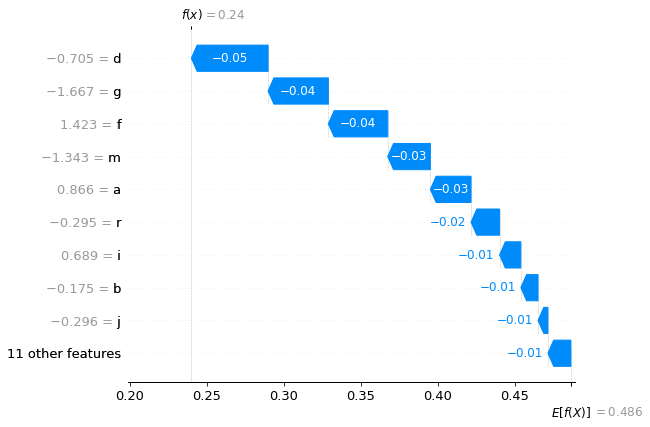

In [195]:
idx = 3
exp = shap.Explanation(shap_values.values, shap_values.base_values[0][1], shap_values.data,
                       feature_names=nms)
shap.plots.waterfall(exp[0,:,1])

In [199]:
shap.plots.force(exp[1,:,1], out_names=["Alive", "Expired"])

In [201]:
shap.plots.force(exp[:,:,0], feature_names=nms)

In [171]:
exp.values.shape

(50, 20)

In [176]:
shap.plots.beeswarm(exp.values)

UnboundLocalError: local variable 'values' referenced before assignment